In [98]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("C:/Users/mkhee/Downloads/train_u6lujuX_CVtuZ9i.csv") #Reading the dataset into a dataframe

In [99]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

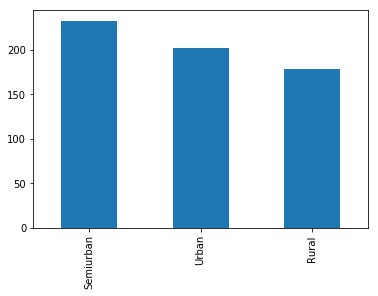

In [12]:
%matplotlib inline
df['Property_Area'].value_counts().plot.bar()


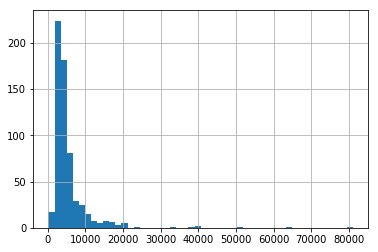

In [13]:
df['ApplicantIncome'].hist(bins=50)

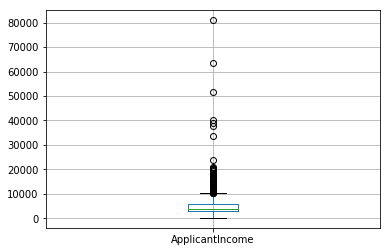

In [128]:
df.boxplot(column='ApplicantIncome')


C:\Users\mkhee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


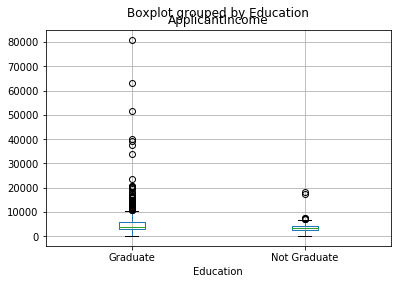

In [17]:
df.boxplot(column=['ApplicantIncome'], by = 'Education')

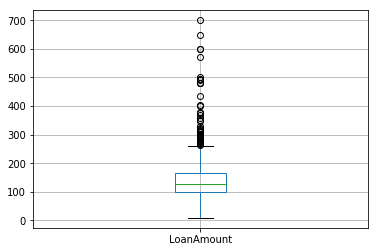

In [132]:
df.boxplot(column='LoanAmount')

ApplicantIncome and LoanAmount require some amount of data munging as there are extreme values. 

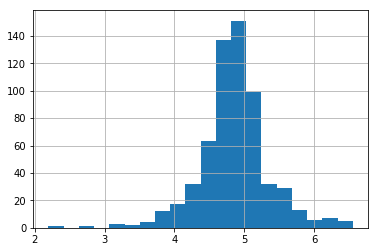

In [129]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

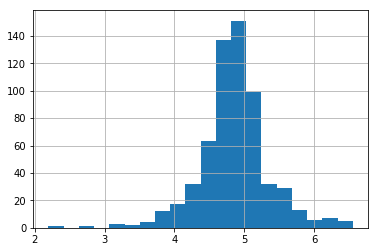

In [131]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

In [100]:
#pivot_table like the MS Excel
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:' )
print(temp1)

print ('\nProbility of getting loan for each Credit History class:' )
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,'Probability of getting loan by credit history')

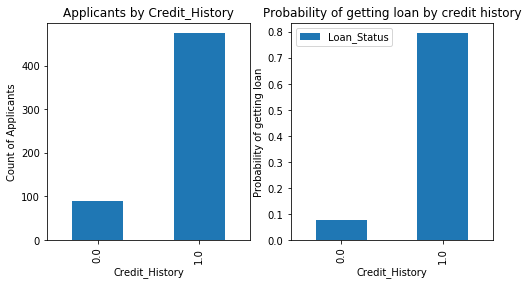

In [101]:
#bar chart using the “matplotlib” library
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)

temp2.plot(ax=plt.gca(),kind = 'bar')#without plt.gca() it will not be displayed inside subplot
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")


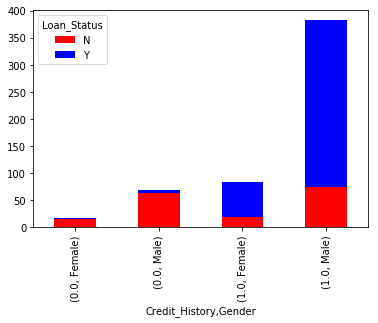

In [102]:
temp3 = pd.crosstab([df.Credit_History,df.Gender], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [103]:
pd.crosstab([df.Credit_History,df.Gender], df['Loan_Status'],margins=True)

Loan_Status              N    Y  All
Credit_History Gender               
0.0            Female   16    1   17
               Male     63    6   69
1.0            Female   20   64   84
               Male     75  307  382
All                    174  378  552

In [104]:
#checking missing values
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [105]:
null_data = df[df.isnull().any(axis=1)]
print(null_data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
16   LP001034    Male      No          1  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate           NaN   
23   LP001050     NaN     Yes          2  Not Graduate            No   
24   LP001052    Male     Yes          1      Graduate           NaN   
29   LP001087  Female      No          2      Graduate           NaN   
30   LP001091    Male     Yes          1      Graduate           NaN   
35   LP001106    Male     Yes          0      Graduate            No   
36   LP001109    Male     Yes          0      Graduate            No   
42   LP001123    Male     Yes          0      Graduate            No   
44   LP001136    Male     Yes          0  Not Graduate           Yes   
45   LP001137  Female      No          0      Graduate          

In [106]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [107]:
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [108]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [109]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [110]:
df['Gender'].fillna('Male',inplace=True)

In [111]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [112]:
df['Married'].fillna('Yes',inplace=True)

In [116]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [115]:
df['Dependents'].fillna('0',inplace=True)

C:\Users\mkhee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


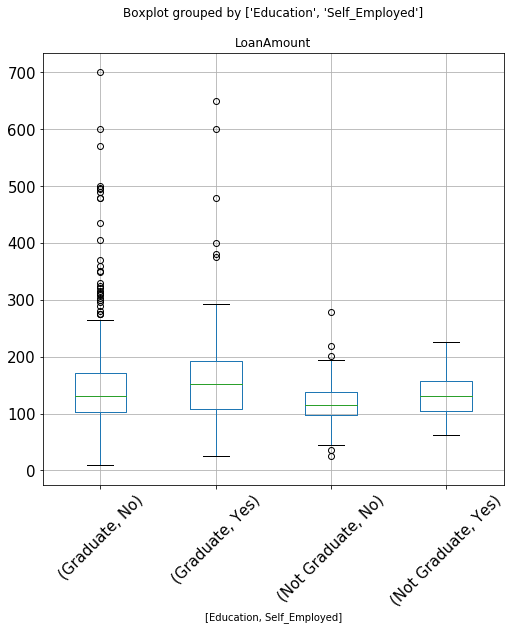

In [81]:
df.boxplot(column=['LoanAmount'], by=['Education','Self_Employed'], grid=True, figsize=(8,8), rot=45, fontsize=15)

In [117]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [118]:
df['Self_Employed'].fillna('No',inplace=True)#since ~86% is 'No' impute with No

In [119]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                131.0         115.0
Yes               152.0         130.0


In [139]:
#another way of imputing Loan Amount
'''def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)'''

"def fage(x):\n return table.loc[x['Self_Employed'],x['Education']]\n# Replace missing values\ndf['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)"

In [120]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [122]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [123]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [124]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [125]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.270%
Cross-Validation Score : 81.110%


In [134]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)#case of overfitting as cv score has gone down.

Accuracy : 90.879%
Cross-Validation Score : 68.074%


In [135]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.341%


This is the perfect case of overfitting and can be resolved in two ways:

Reducing the number of predictors
Tuning the model parameters

In [137]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History      0.290959
TotalIncome_log     0.253040
LoanAmount_log      0.221823
Dependents          0.050466
Property_Area       0.049481
Loan_Amount_Term    0.044664
Education           0.023590
Gender              0.022477
Married             0.022219
Self_Employed       0.021281
dtype: float64


In [138]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.410%
Cross-Validation Score : 81.108%
